<a href="https://colab.research.google.com/github/Mudita1307/Semiconductor-Manufacturing-Process/blob/main/Major_Mudita.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **SEMICONDUCTOR MANUFACTURING PROCESS**


## **CONTENT**


1.   Introduction
2.   Import Libraries
3.   Data Exploration
      *   3.1. Detailed Information of the Dataset
      *   3.2. Correlation of Columns(Attributes)
      *   3.3. Various Visualizations from Dataset
4.   Data Cleaning
      * 4.1 Missing value treatment
          * 4.1.1. Calculating Missing Values
          * 4.1.2. Dropping columns with a high percentage of missing values
          * 4.1.3. Fill in the remaining missing values using the mean/median/mode

    * 4.2. Drop attribute's if required using relevant functional knowledge
     * 4.3. Make all relevant modifications on the data using both functional/logical reasoning/assumptions
5.   Data analysis & visualisation
        
        * 5.1. Statistical Analysis
        * 5.2. Univariate Analysis
        * 5.3. Bivariate Analysis
        * 5.4. Multivariate Analysis
6. Data Pre-Processing
        
      * 6.1. Segregate predictors vs target attributes
      * 6.2. Check for target balancing and fix it if found imbalanced
          (read SMOTE)
      * 6.3. Standardise the data
      * 6.4. Check if the train and test data have similar statistical characteristics when compared with original data.
7. Model training, testing and tuning
   
      * 7.1. Logistic Regression
      * 7.2. Random Forest
      * 7.3. Check the best accuracy
8. Post Training

    * 8.1. KNN
    * 8.2. Gradient boosting
    * 8.3. Support Vector Classifier
    * 8.4. Naive Bayes
    * 8.5. Support Vector Machine
    * 8.6. Save the selected model for future use using pickle
9. Conclusion and Improvisation
   
    * 9.1. Conclusion
    * 9.2. Improvisation



## **1. INTRODUCTION**

We will build a classifier to predict the Pass/Fail yield of a
particular process entity and analyse whether all the features are required to build the
model or not.

## **2. IMPORTING LIBRARIES**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,average_precision_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn import metrics
from sklearn import preprocessing

In [ ]:
# Mounting google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **3. DATA EXPLORATION**

In this section, various explanations will be made about dataset.

Here we will import the dataset first. Then, we will explain the columns(features) of the dataset one by one.

In [ ]:
df = pd.read_csv('/content/drive/My Drive/signal.csv')  # Read CSV file and load into "df" variable

In [ ]:
df.shape  # Print the dimensions of the DataFrame

(1567, 592)

In [ ]:
df.size  # Print total number of elements in the DataFrame

927664

In [ ]:
df.dtypes  # Print the data type of each column

,0
Time,object
0,float64
1,float64
2,float64
3,float64
4,float64
5,float64
6,float64
7,float64
8,float64


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1567 entries, 0 to 1566
Columns: 592 entries, Time to Pass/Fail
dtypes: float64(590), int64(1), object(1)
memory usage: 7.1+ MB


In [ ]:
df.describe()  # Print table which contain statistical data of the dataset

,0,1,2,3,4,5,6,7,8,9,...,581,582,583,584,585,586,587,588,589,Pass/Fail
count,1561.000000,1560.000000,1553.000000,1553.000000,1553.000000,1553.0,1553.000000,1558.000000,1565.000000,1565.000000,...,618.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1567.000000
mean,3014.452896,2495.850231,2200.547318,1396.376627,4.197013,100.0,101.112908,0.121822,1.462862,-0.000841,...,97.934373,0.500096,0.015318,0.003847,3.067826,0.021458,0.016475,0.005283,99.670066,-0.867262
std,73.621787,80.407705,29.513152,441.691640,56.355540,0.0,6.237214,0.008961,0.073897,0.015116,...,87.520966,0.003404,0.017180,0.003720,3.578033,0.012358,0.008808,0.002867,93.891919,0.498010
min,2743.240000,2158.750000,2060.660000,0.000000,0.681500,100.0,82.131100,0.000000,1.191000,-0.053400,...,0.000000,0.477800,0.006000,0.001700,1.197500,-0.016900,0.003200,0.001000,0.000000,-1.000000
25%,2966.260000,2452.247500,2181.044400,1081.875800,1.017700,100.0,97.920000,0.121100,1.411200,-0.010800,...,46.184900,0.497900,0.011600,0.003100,2.306500,0.013425,0.010600,0.003300,44.368600,-1.000000
50%,3011.490000,2499.405000,2201.066700,1285.214400,1.316800,100.0,101.512200,0.122400,1.461600,-0.001300,...,72.288900,0.500200,0.013800,0.003600,2.757650,0.020500,0.014800,0.004600,71.900500,-1.000000
75%,3056.650000,2538.822500,2218.055500,1591.223500,1.525700,100.0,104.586700,0.123800,1.516900,0.008400,...,116.539150,0.502375,0.016500,0.004100,3.295175,0.027600,0.020300,0.006400,114.749700,-1.000000
max,3356.350000,2846.440000,2315.266700,3715.041700,1114.536600,100.0,129.252200,0.128600,1.656400,0.074900,...,737.304800,0.509800,0.476600,0.104500,99.303200,0.102800,0.079900,0.028600,737.304800,1.000000


**Observations**:  As you can see from the outputs shown above, there are 1567 rows, 592 columns(attributes). The rows are also indexed from 0 to 1566. The columns have varied ranges of values, with some columns having close ranges and others having larger ranges.Now, let's explain what statistics each column contain:

*   **count:** The number of non-null entries in each column.
*   **mean:** The average value of the entries in each column.
*   **std:** The standard deviation of the values in each column.
*   **min:** The minimum value in each column.
*   **25%:** The 25th percentile value (Q1) in each column.
*   **50%:** The median value (Q2) in each column.
*   **75%:** The 75th percentile value (Q3) in each column.
*   **max:** The maximum value in each column.

We gave the necessary information about dataset. Now, looking at the first 5 and last 5 entries of dataset, let's see what are the values that are being held.


In [ ]:
df.head()  # Prints first 5 entries of the dataframe

,Time,0,1,2,3,4,5,6,7,8,...,581,582,583,584,585,586,587,588,589,Pass/Fail
0,2008-07-19 11:55:00,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,...,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN,-1
1,2008-07-19 12:32:00,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,...,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1
2,2008-07-19 13:17:00,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,...,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1
3,2008-07-19 14:43:00,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,...,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,-1
4,2008-07-19 15:22:00,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,...,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,-1


In [ ]:
df.tail()  # Prints last 5 entries of the dataframe

,Time,0,1,2,3,4,5,6,7,8,...,581,582,583,584,585,586,587,588,589,Pass/Fail
1562,2008-10-16 15:13:00,2899.41,2464.36,2179.7333,3085.3781,1.4843,100.0,82.2467,0.1248,1.3424,...,203.1720,0.4988,0.0143,0.0039,2.8669,0.0068,0.0138,0.0047,203.1720,-1
1563,2008-10-16 20:49:00,3052.31,2522.55,2198.5667,1124.6595,0.8763,100.0,98.4689,0.1205,1.4333,...,NaN,0.4975,0.0131,0.0036,2.6238,0.0068,0.0138,0.0047,203.1720,-1
1564,2008-10-17 05:26:00,2978.81,2379.78,2206.3000,1110.4967,0.8236,100.0,99.4122,0.1208,NaN,...,43.5231,0.4987,0.0153,0.0041,3.0590,0.0197,0.0086,0.0025,43.5231,-1
1565,2008-10-17 06:01:00,2894.92,2532.01,2177.0333,1183.7287,1.5726,100.0,98.7978,0.1213,1.4622,...,93.4941,0.5004,0.0178,0.0038,3.5662,0.0262,0.0245,0.0075,93.4941,-1
1566,2008-10-17 06:07:00,2944.92,2450.76,2195.4444,2914.1792,1.5978,100.0,85.1011,0.1235,NaN,...,137.7844,0.4987,0.0181,0.0040,3.6275,0.0117,0.0162,0.0045,137.7844,-1


## **4. DATA CLEANING**

### **4.1. Missing Value Treatment**

**4.1.1.  Calculating Missing Values**

In [ ]:
missing_values = df.isnull().sum().any()
print(missing_values)

True


Now, lets drop features having more than 700 missing values

**4.1.2.   Dropping columns with a high percentage of missing values**

In [ ]:
d=df.isnull().sum()
j=[]
for i in d.keys():
  if d[i]>700:
    print(i,d[j])
    j.append(i)

72 Series([], dtype: int64)
73 72    794
dtype: int64
85 72    794
73    794
dtype: int64
109 72     794
73     794
85    1341
dtype: int64
110 72      794
73      794
85     1341
109    1018
dtype: int64
111 72      794
73      794
85     1341
109    1018
110    1018
dtype: int64
112 72      794
73      794
85     1341
109    1018
110    1018
111    1018
dtype: int64
157 72      794
73      794
85     1341
109    1018
110    1018
111    1018
112     715
dtype: int64
158 72      794
73      794
85     1341
109    1018
110    1018
111    1018
112     715
157    1429
dtype: int64
220 72      794
73      794
85     1341
109    1018
110    1018
111    1018
112     715
157    1429
158    1429
dtype: int64
244 72      794
73      794
85     1341
109    1018
110    1018
111    1018
112     715
157    1429
158    1429
220    1341
dtype: int64
245 72      794
73      794
85     1341
109    1018
110    1018
111    1018
112     715
157    1429
158    1429
220    1341
244    1018
dtype: int64
246 

In [ ]:
df_new = df.drop(j, axis=1)

In [ ]:
df_new.shape

(1567, 560)

In [ ]:
df_new.drop('Time',axis=1,inplace=True)
print('Column dropped successfully')

Column dropped successfully


**4.1.3.  Fill in the remaining missing values using the mean/median/mode**

In this section, we will determine which method to use for replacing remaining missing values:

* Mean: Use if the data type is numerical.
* Median: Use if the data type is numerical and the DataFrame contains few unique values.
* Mode: Use if the data type is categorical.

In [ ]:
# Finding uniques values in given dataframe
unique_values = []
for col in df_new.columns:
    if df_new[col].dtype != object:  # Check if the column is numeric
        unique_values.extend(np.unique(df_new[col]))

total_unique_count = len(set(unique_values))  # Use a set to count unique values efficiently
print(f"Total unique values in numeric columns: {total_unique_count}")

Total unique values in numeric columns: 209534


**Observations:**
* As shown in the output, the total number of unique values in the numeric columns is 209,534, which is very high. Thus, we can't use the median for replacing missing values.

* The given dfFrame is of mixed df types, containing both numerical and categorical data. However, 'time' is the only column with categorical data, which is already dropped.

* Therefore, we will use the mean for replacing missing values.

In [ ]:
df_new.isna().sum()

,0
0,6
1,7
2,14
3,14
4,14
5,14
6,14
7,9
8,2
9,2


In [ ]:
# Fill missing values with the mean of the column
dff=df_new.fillna(df_new.mean())
print('Missing values filled successfully')

Missing values filled successfully


In [ ]:
dff.isna().sum().any()        # Check if there are any missing values left in the DataFrame

False

### **4.2. Drop attribute's if required using relevant functional knowledge**

In the previous step, we have already dropped column having more than 40% of missing values

### **4.3. Make all relevant modifications on the data using both functional/logical reasoning/assumptions**

Based on logical reasoning, the column 'time' was dropped in the previous step because it is irrelevant for the analysis.

## **5.  DATA ANALYSIS & VISUALIZATION**

### **5.1.  Statistical analysis**

In this study, we employ statistical analysis techniques to uncover patterns, relationships, and trends within our dataset, leveraging data visualization tools to effectively communicate these insights and facilitate a deeper understanding of the underlying data.

In [ ]:
stats= dff.describe()
stats

,0,1,2,3,4,5,6,7,8,9,...,577,582,583,584,585,586,587,588,589,Pass/Fail
count,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.0,1567.000000,1567.000000,1567.000000,1567.000000,...,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000
mean,3014.452896,2495.850231,2200.547318,1396.376627,4.197013,100.0,101.112908,0.121822,1.462862,-0.000841,...,16.642363,0.500096,0.015318,0.003847,3.067826,0.021458,0.016475,0.005283,99.670066,-0.867262
std,73.480613,80.227793,29.380932,439.712852,56.103066,0.0,6.209271,0.008936,0.073849,0.015107,...,12.485267,0.003403,0.017174,0.003719,3.576891,0.012354,0.008805,0.002866,93.861936,0.498010
min,2743.240000,2158.750000,2060.660000,0.000000,0.681500,100.0,82.131100,0.000000,1.191000,-0.053400,...,4.582000,0.477800,0.006000,0.001700,1.197500,-0.016900,0.003200,0.001000,0.000000,-1.000000
25%,2966.665000,2452.885000,2181.099950,1083.885800,1.017700,100.0,97.937800,0.121100,1.411250,-0.010800,...,11.501550,0.497900,0.011600,0.003100,2.306500,0.013450,0.010600,0.003300,44.368600,-1.000000
50%,3011.840000,2498.910000,2200.955600,1287.353800,1.317100,100.0,101.492200,0.122400,1.461600,-0.001300,...,13.817900,0.500200,0.013800,0.003600,2.757700,0.020500,0.014800,0.004600,72.023000,-1.000000
75%,3056.540000,2538.745000,2218.055500,1590.169900,1.529600,100.0,104.530000,0.123800,1.516850,0.008400,...,17.080900,0.502350,0.016500,0.004100,3.294950,0.027600,0.020300,0.006400,114.749700,-1.000000
max,3356.350000,2846.440000,2315.266700,3715.041700,1114.536600,100.0,129.252200,0.128600,1.656400,0.074900,...,96.960100,0.509800,0.476600,0.104500,99.303200,0.102800,0.079900,0.028600,737.304800,1.000000


**Observations:**
* The mean values of the columns vary widely, indicating a range of different scales and units across the features.
* Standard deviations also vary significantly, suggesting differing degrees of variability in the data columns.
* There are significant differences between the minimum and maximum values for most columns, implying that the data may contain some outliers or a broad range of values.
* The 25th, 50th (median), and 75th percentiles show the central tendency and dispersion of the data. This information helps understand the skewness of the data distributions in different columns.
* The 'Pass/Fail' target feature has a mean value of -0.867262 and a standard deviation of 0.498010, with values ranging from -1.0000 to 1.0000. This indicates that the dataset has a binary outcome variable.
Certain features, such as "5" and "13," are redundant because all their values are 100 and 0, respectively.
* Most features have float values in different ranges; we will plot separate graphs to better understand them.
* Features with more than 40% missing values have already been dropped.
We will assess feature importance to determine if we can further reduce the number of features.
* Features with zero standard deviation can be dropped after checking their importance.
* For feature selection, we can use forward selection or backward elimination methods, and we may also apply PCA to reduce the overall number of features.




In [ ]:
std = dff.std(axis=0)

In [ ]:
std[std==0].shape

(116,)

**Observation:** There are 116 features having the same value for all rows so we will drop them, in order to reduce data redundancy.

In [ ]:
zero_std=std[std==0]
col_to_drop = zero_std.index.tolist()

In [ ]:
non_zero_std_dff=dff.drop(col_to_drop,axis=1)
non_zero_std_dff.shape

(1567, 443)

### **5.2. Univariate Analysis**

Univariate analysis involves examining the distribution, central tendency, and dispersion of a single variable, providing valuable insights into its individual characteristics and behavior within the dataset.

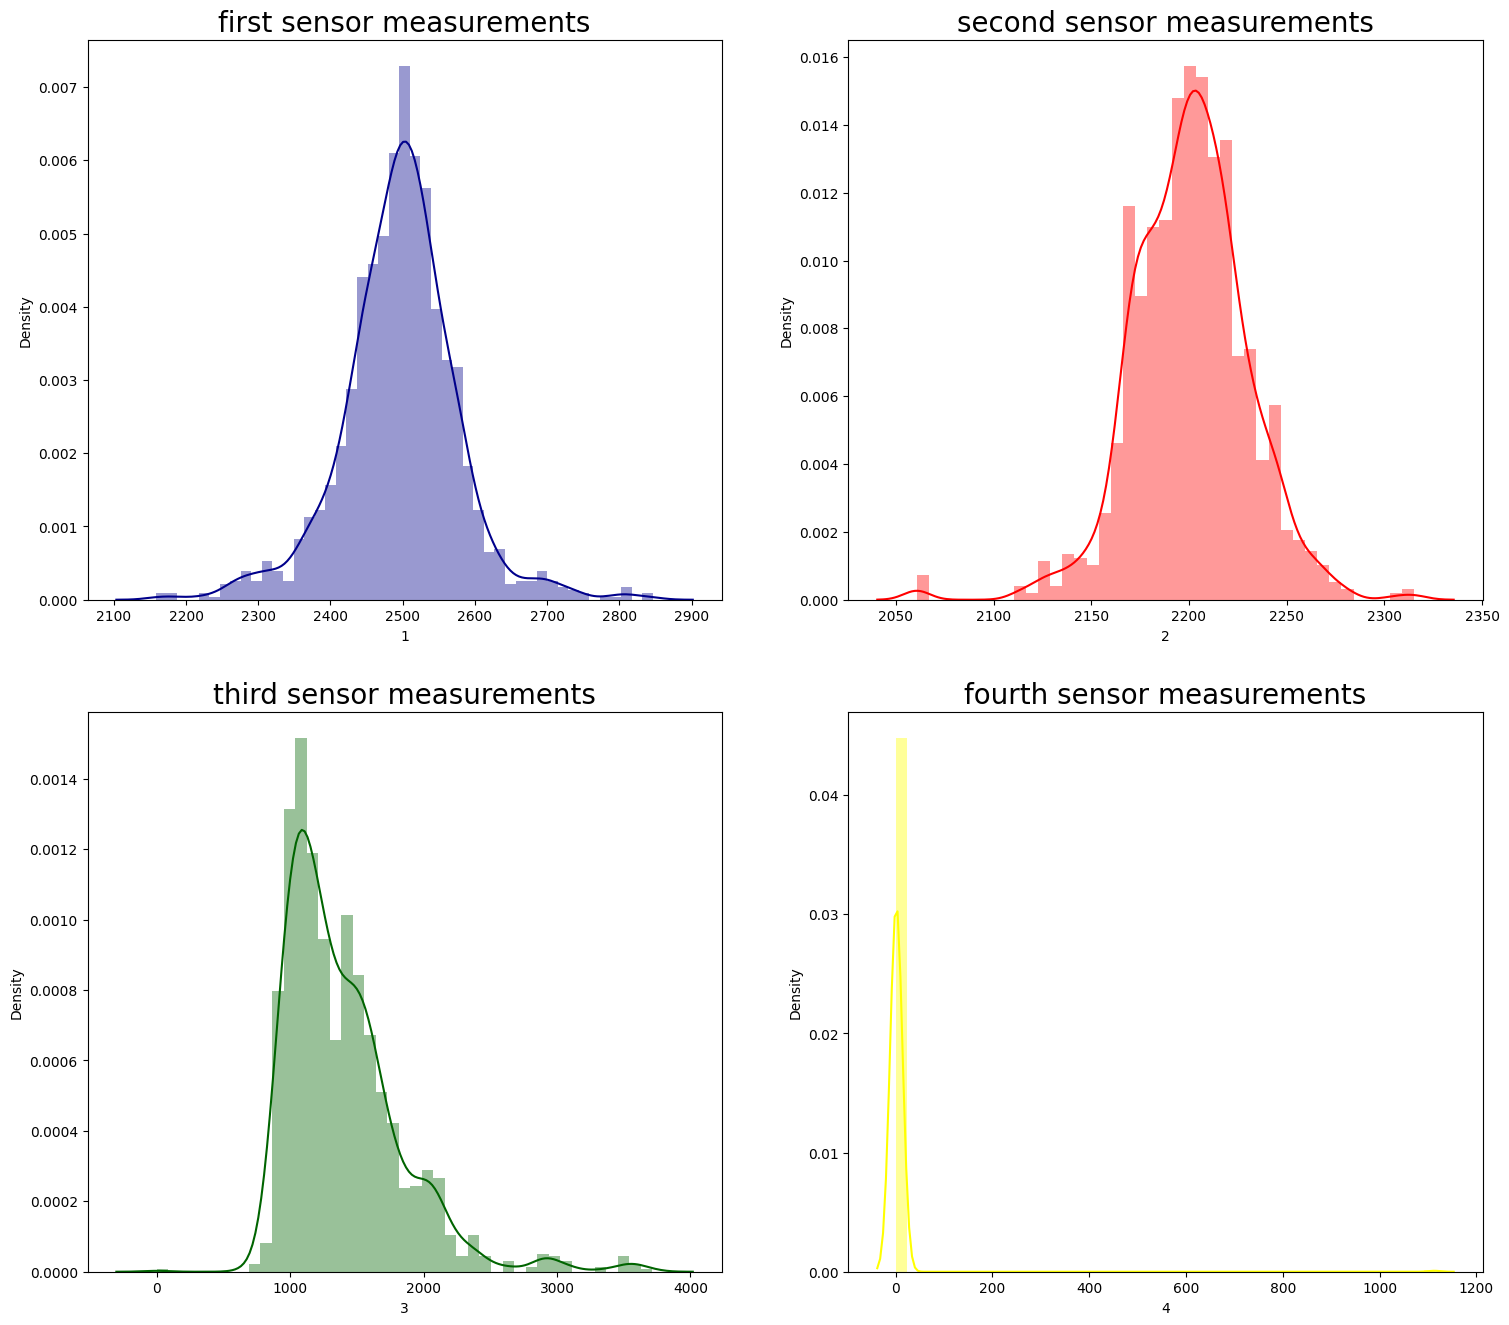

In [ ]:
# distribution plot to see first four column's distribution
# Set the figure size
plt.rcParams['figure.figsize'] = (18,16)

# Create the histogram
plt.subplot(2,2,1)
sns.distplot(dff['1'],color='darkblue')
plt.title('first sensor measurements', fontsize=20)

plt.subplot(2,2,2)
sns.distplot(dff['2'],color='red')
plt.title('second sensor measurements', fontsize=20)

plt.subplot(2,2,3)
sns.distplot(dff['3'],color='darkgreen')
plt.title('third sensor measurements', fontsize=20)

plt.subplot(2,2,4)
sns.distplot(dff['4'],color='yellow')
plt.title('fourth sensor measurements', fontsize=20)

# Show the plots
plt.show()

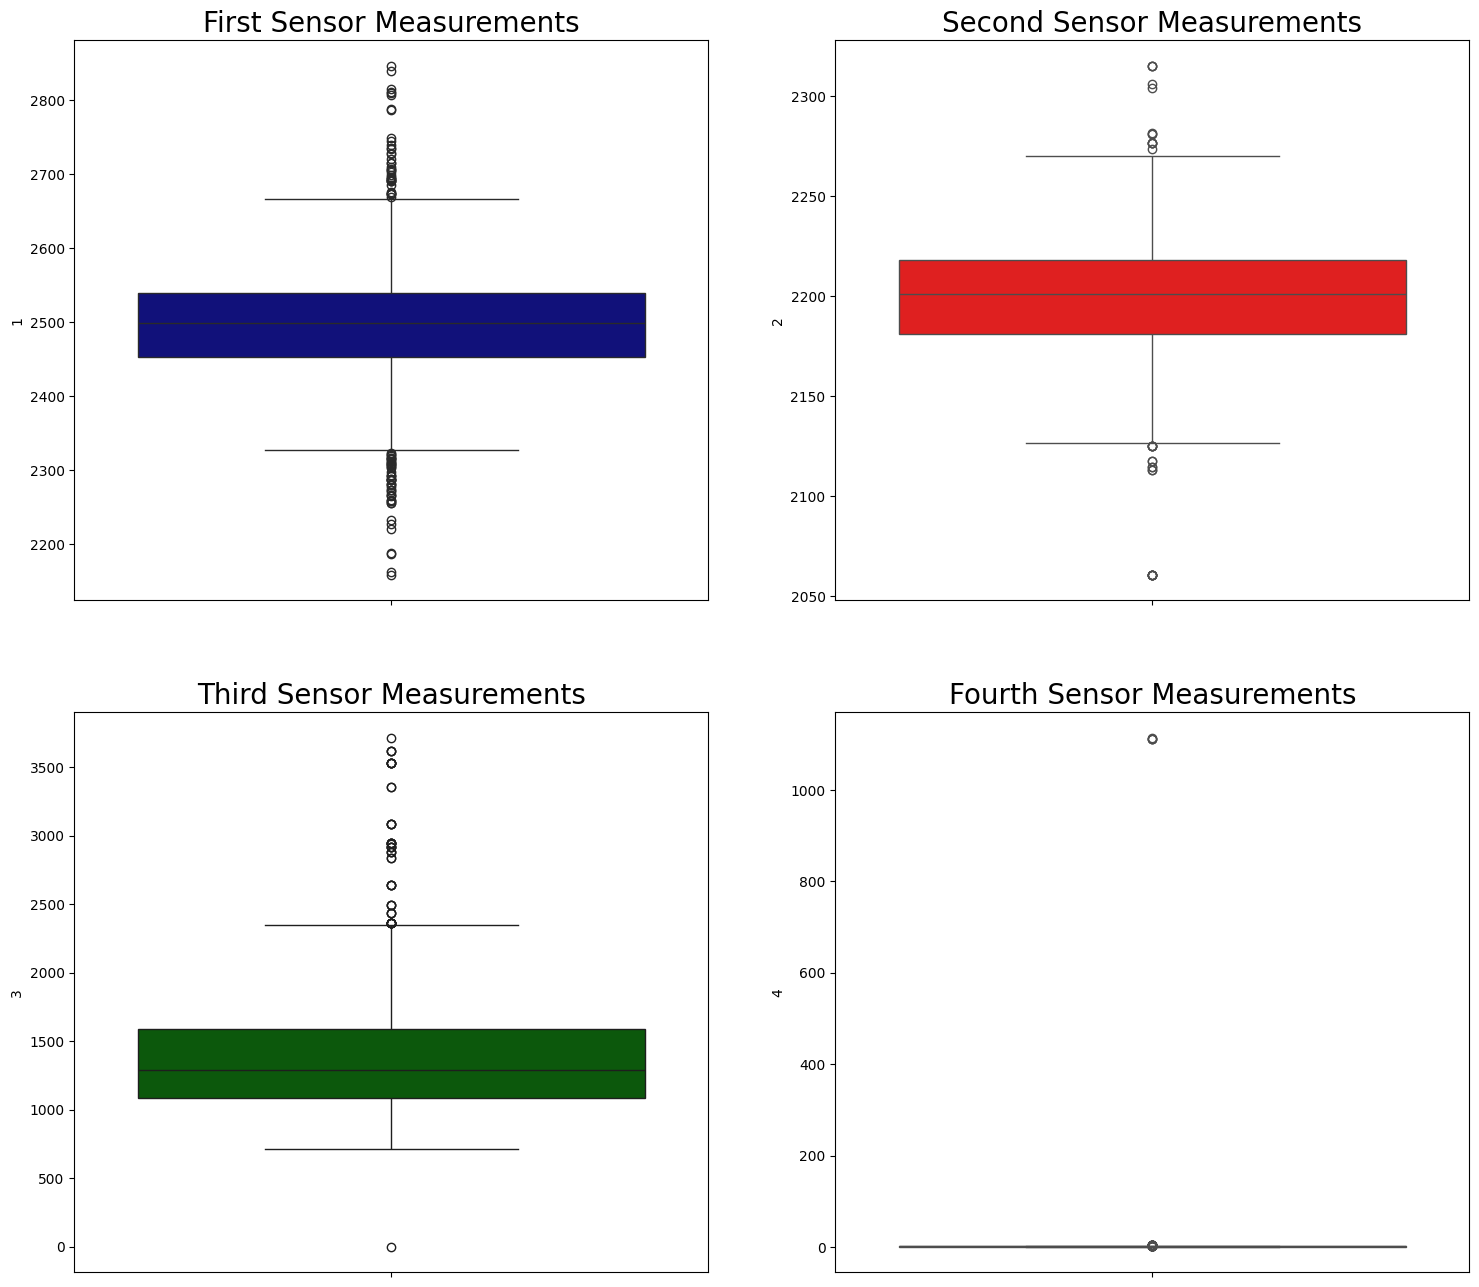

In [ ]:
# Set the figure size
plt.rcParams['figure.figsize'] = (18, 16)

# Create the boxplots
plt.subplot(2, 2, 1)
sns.boxplot(y=dff['1'], color='darkblue')
plt.title('First Sensor Measurements', fontsize=20)

plt.subplot(2, 2, 2)
sns.boxplot(y=dff['2'], color='red')
plt.title('Second Sensor Measurements', fontsize=20)

plt.subplot(2, 2, 3)
sns.boxplot(y=dff['3'], color='darkgreen')
plt.title('Third Sensor Measurements', fontsize=20)

plt.subplot(2, 2, 4)
sns.boxplot(y=dff['4'], color='yellow')
plt.title('Fourth Sensor Measurements', fontsize=20)

# Show the plots
plt.show()


**Observations:**

* The first sensor shows a relatively normal distribution but with some right skewness and a significant number of high-value outliers.
* The second sensor measurements are more symmetrically distributed, suggesting a consistent performance or recording method.
* The third sensor data has a pronounced right skew, indicating that higher values are rare but present, with numerous high-value outliers.
* The fourth sensor measurements are highly skewed towards lower values, with most measurements being near zero and a few extreme high outliers.

### **5.3. Bivariate Analysis**

It allows us to understand how one variable changes in response to another and to identify potential correlations, dependencies, and patterns.

In [ ]:
cor= dff.corr()


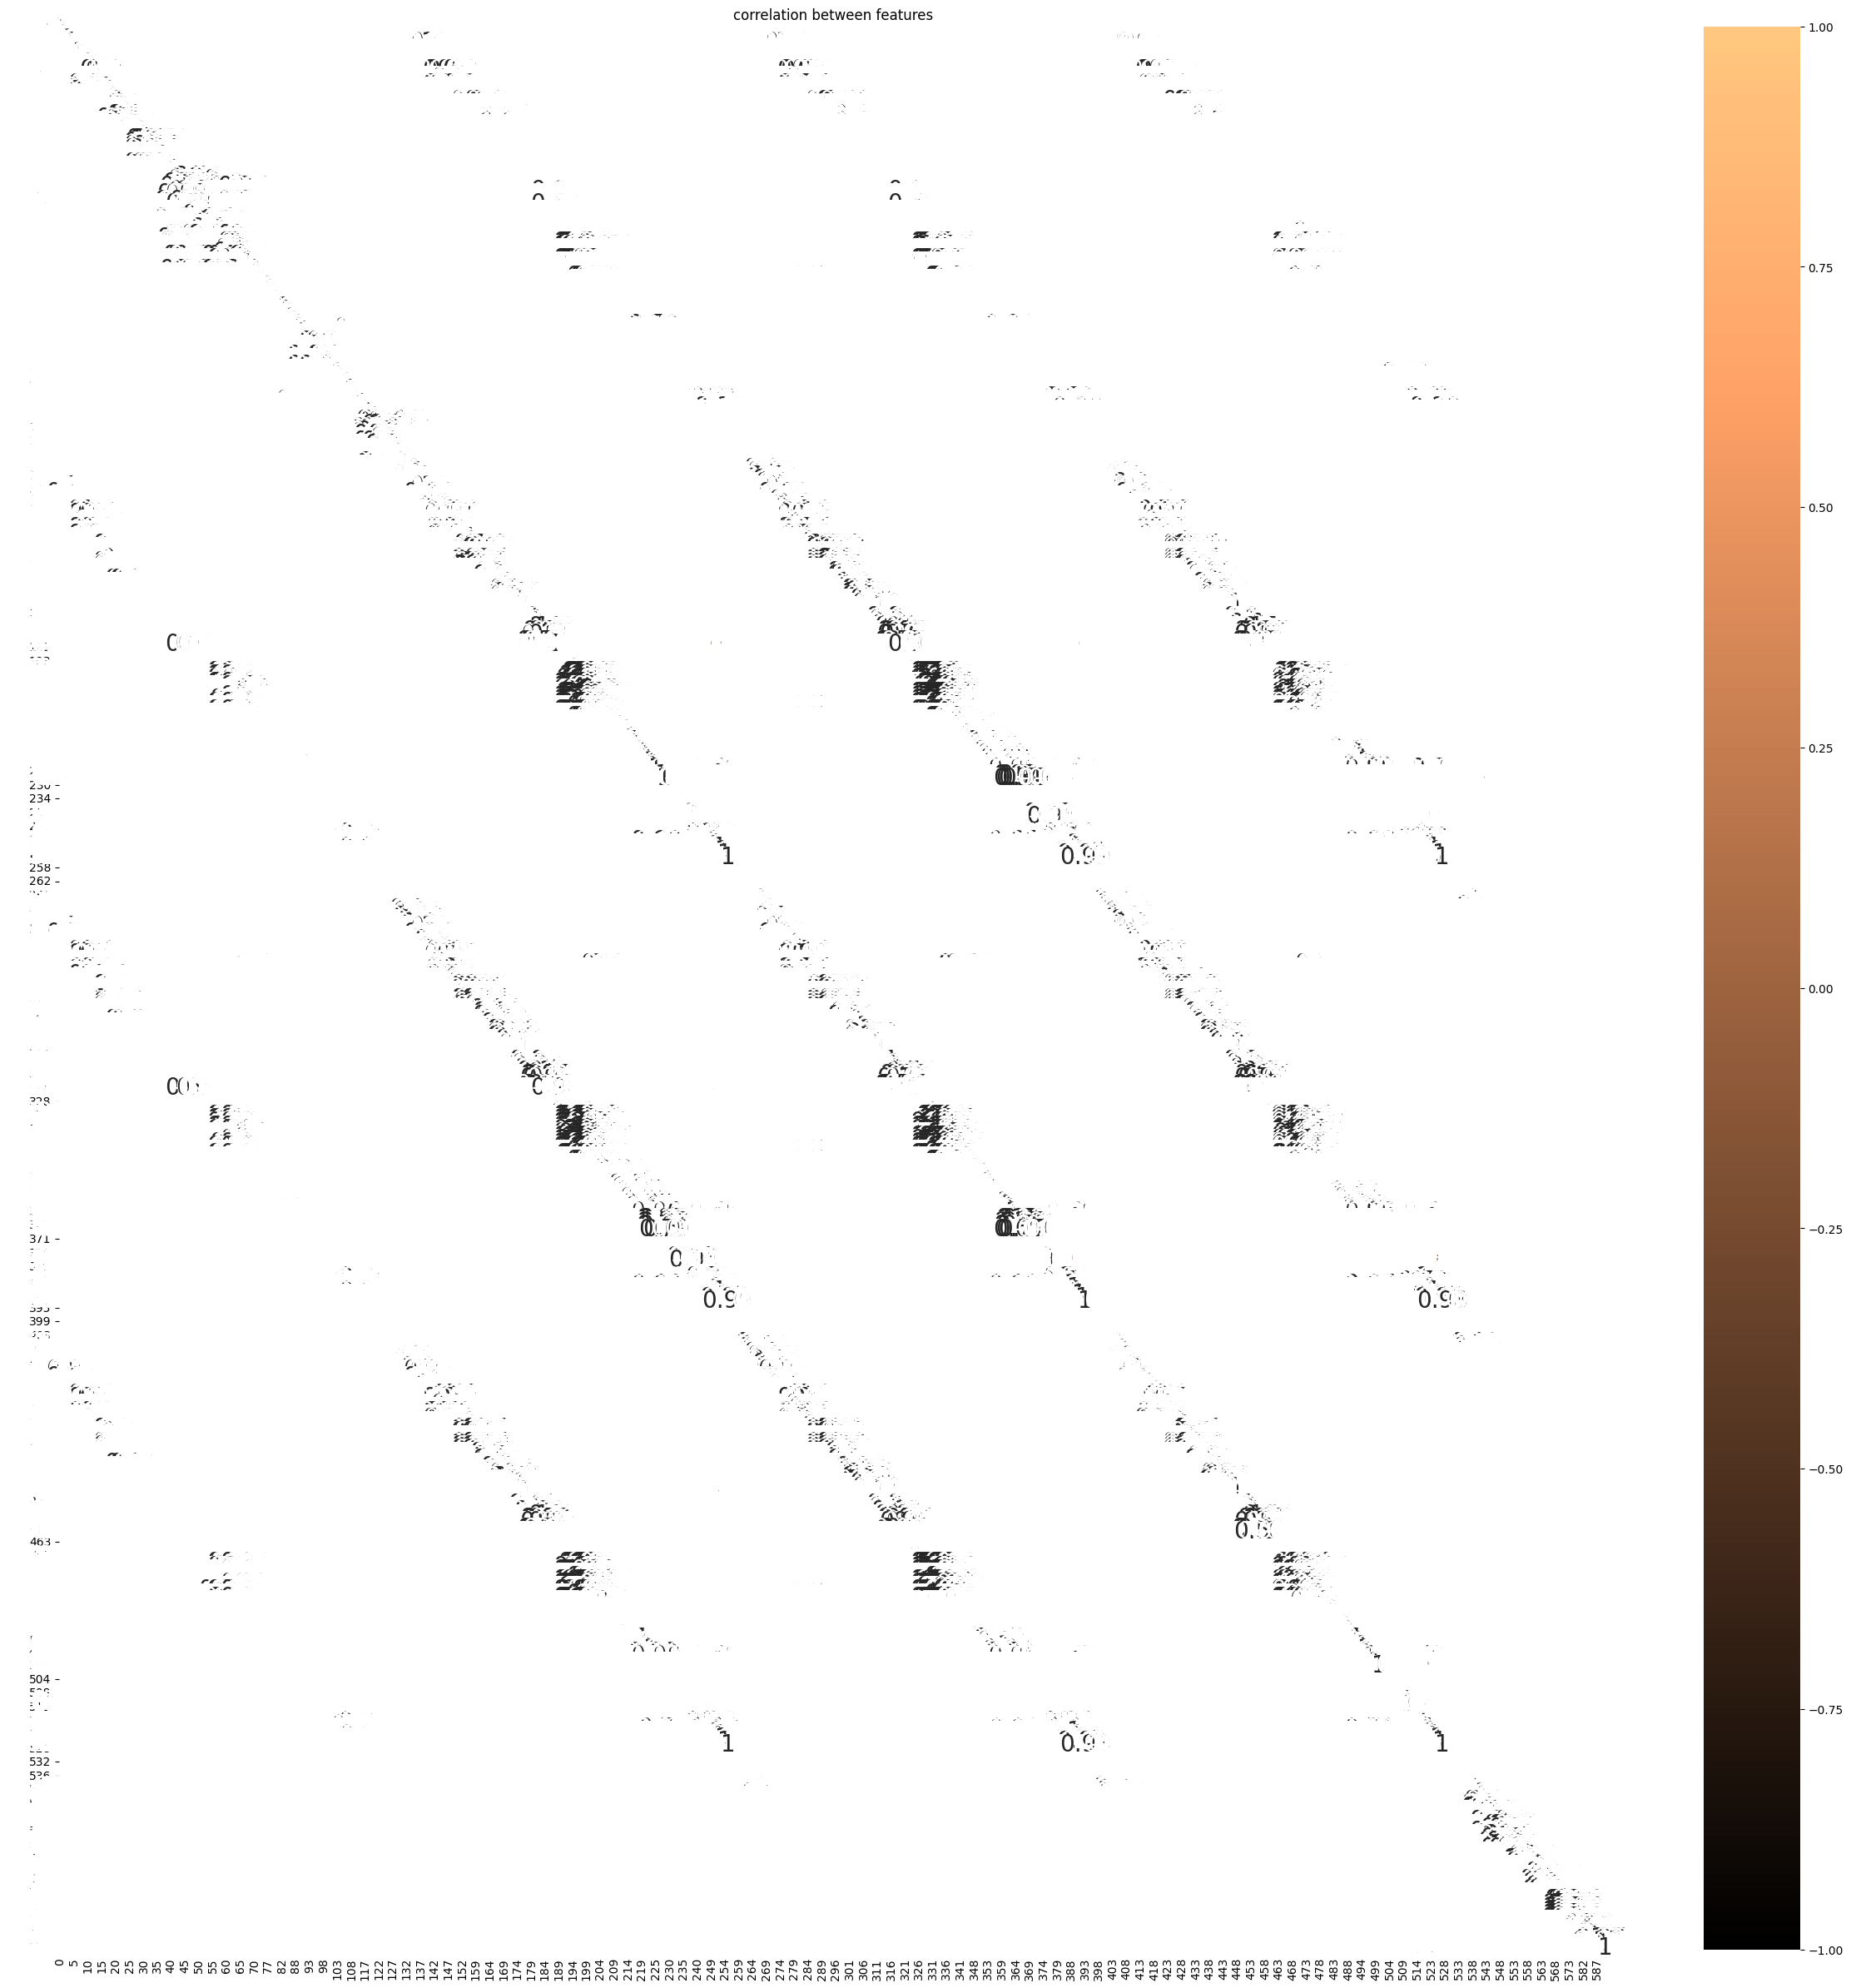

In [ ]:
# to get the correlation matrix
plt.figure(figsize=(30,30))
sns.heatmap(cor, cmap='copper', vmax=1.0, vmin=-1.0, annot=True, annot_kws={"size":20})
plt.title('correlation between features')
plt.show()

**Observation:**
*  There are too many features hence bivariate plot is messy
*  We do see black colour in non-diagnol places which tells us that there are correlated features

### **5.4. Multivariate Analysis**

As we observed in the bivariate analysis, the plot is messy. Therefore, it will be even messier in multivariate analysis, making it of no use to plot it.

## **6. DATA PRE-PROCESSING**

### **6.1. Segregate predictors vs target attributes**

In [ ]:
# select independent feature for model building
x = dff.drop('Pass/Fail', axis=1)
y = dff['Pass/Fail']

# split data into train and test subset
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42, stratify=y)

print(x_train.shape)
print(x_test.shape)

(1096, 558)
(471, 558)


In [ ]:
x_train.head(2)

,0,1,2,3,4,5,6,7,8,9,...,576,577,582,583,584,585,586,587,588,589
594,3042.70,2355.11,2242.8555,1430.7270,0.8832,100.0,106.2100,0.1216,1.4817,0.0030,...,1.5148,15.9361,0.4937,0.0153,0.0034,3.0907,0.0256,0.0189,0.0060,73.8657
1380,3093.31,2456.82,2207.9555,1283.4368,1.8467,100.0,95.4022,0.1216,1.4198,-0.0156,...,2.0854,23.2820,0.4988,0.0126,0.0032,2.5209,0.0203,0.0134,0.0038,65.9827


### **6.2. Check for target balancing and fix it if found imbalanced (read SMOTE)**

In [ ]:
pd.value_counts(dff['Pass/Fail'])

,count
Pass/Fail,
-1,1463
1,104


In [ ]:
print("before oversampling, counts of label '1' :{}".format(sum(y_train==1)))
print("before oversampling, counts of label '-1' :{}".format(sum(y_train==-1)))

before oversampling, counts of label '1' :73
before oversampling, counts of label '-1' :1023


In [ ]:
from imblearn.over_sampling import SMOTE

sm=SMOTE(random_state=2)
x_train_res,y_train_res=sm.fit_resample(x_train,y_train.ravel())

print("after oversampling, the shape of train_x:{}".format(x_train_res.shape))
print("after oversampling, the shape of train_y :{}\n".format(y_train_res.shape))

after oversampling, the shape of train_x:(2046, 558)
after oversampling, the shape of train_y :(2046,)



In [ ]:
print("after oversampling, counts of label '1' :{}".format(sum(y_train_res==1)))
print("after oversampling, counts of label '-1' :{}".format(sum(y_train_res==-1)))

after oversampling, counts of label '1' :1023
after oversampling, counts of label '-1' :1023


In [ ]:
pd.value_counts(y_test)

,count
Pass/Fail,
-1,440
1,31


### **6.3.  Standardise the data**

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train_sc = sc.fit_transform(x_train_res)
x_test_sc = sc.transform(x_test)

### **6.4. Check if the train and test data have similar statistical characteristics when compared with original data.**

In [ ]:
dff.describe()

,0,1,2,3,4,5,6,7,8,9,...,577,582,583,584,585,586,587,588,589,Pass/Fail
count,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.0,1567.000000,1567.000000,1567.000000,1567.000000,...,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000
mean,3014.452896,2495.850231,2200.547318,1396.376627,4.197013,100.0,101.112908,0.121822,1.462862,-0.000841,...,16.642363,0.500096,0.015318,0.003847,3.067826,0.021458,0.016475,0.005283,99.670066,-0.867262
std,73.480613,80.227793,29.380932,439.712852,56.103066,0.0,6.209271,0.008936,0.073849,0.015107,...,12.485267,0.003403,0.017174,0.003719,3.576891,0.012354,0.008805,0.002866,93.861936,0.498010
min,2743.240000,2158.750000,2060.660000,0.000000,0.681500,100.0,82.131100,0.000000,1.191000,-0.053400,...,4.582000,0.477800,0.006000,0.001700,1.197500,-0.016900,0.003200,0.001000,0.000000,-1.000000
25%,2966.665000,2452.885000,2181.099950,1083.885800,1.017700,100.0,97.937800,0.121100,1.411250,-0.010800,...,11.501550,0.497900,0.011600,0.003100,2.306500,0.013450,0.010600,0.003300,44.368600,-1.000000
50%,3011.840000,2498.910000,2200.955600,1287.353800,1.317100,100.0,101.492200,0.122400,1.461600,-0.001300,...,13.817900,0.500200,0.013800,0.003600,2.757700,0.020500,0.014800,0.004600,72.023000,-1.000000
75%,3056.540000,2538.745000,2218.055500,1590.169900,1.529600,100.0,104.530000,0.123800,1.516850,0.008400,...,17.080900,0.502350,0.016500,0.004100,3.294950,0.027600,0.020300,0.006400,114.749700,-1.000000
max,3356.350000,2846.440000,2315.266700,3715.041700,1114.536600,100.0,129.252200,0.128600,1.656400,0.074900,...,96.960100,0.509800,0.476600,0.104500,99.303200,0.102800,0.079900,0.028600,737.304800,1.000000


In [ ]:
x_train_res_df= pd.DataFrame(x_train_res)
x_train_res_df.describe()

,0,1,2,3,4,5,6,7,8,9,...,576,577,582,583,584,585,586,587,588,589
count,2046.000000,2046.000000,2046.000000,2046.000000,2046.000000,2046.0,2046.000000,2046.000000,2046.000000,2046.000000,...,2046.000000,2046.000000,2046.000000,2046.000000,2046.000000,2046.000000,2046.000000,2046.000000,2046.000000,2046.000000
mean,3006.489964,2500.998525,2201.463494,1386.559504,2.427920,100.0,101.188524,0.122010,1.469286,-0.002769,...,5.110195,15.371203,0.500042,0.015583,0.003908,3.119389,0.021847,0.017311,0.005557,103.594880
std,72.176764,71.502272,27.379963,367.764111,34.722682,0.0,5.405878,0.006289,0.063578,0.013433,...,14.905316,9.382901,0.003234,0.015140,0.003283,3.151364,0.011658,0.008313,0.002653,83.805940
min,2743.240000,2162.870000,2060.660000,711.025800,0.681500,100.0,82.131100,0.000000,1.200500,-0.041000,...,0.898700,4.582000,0.477800,0.006500,0.002000,1.284500,-0.016900,0.003200,0.001000,0.000000
25%,2956.662348,2463.208094,2184.450436,1110.760830,1.068407,100.0,98.592158,0.121198,1.430636,-0.010875,...,1.441000,11.384862,0.498069,0.011933,0.003190,2.389183,0.014348,0.011500,0.003700,50.600975
50%,2997.382740,2503.390000,2199.791954,1322.038012,1.323813,100.0,101.154223,0.122200,1.467958,-0.002585,...,1.675259,13.666933,0.500200,0.014200,0.003687,2.838795,0.021064,0.015900,0.005072,79.775200
75%,3046.555000,2538.377500,2217.000000,1578.835810,1.518800,100.0,103.929253,0.123400,1.513255,0.004514,...,1.910700,16.346500,0.502075,0.016900,0.004200,3.383614,0.027890,0.021297,0.006900,125.126443
max,3356.350000,2846.440000,2315.266700,3715.041700,1112.160000,100.0,129.252200,0.128600,1.656400,0.060900,...,90.423500,96.960100,0.509800,0.476600,0.104500,99.303200,0.102800,0.079900,0.028600,737.304800


In [ ]:
x_test.describe()

,0,1,2,3,4,5,6,7,8,9,...,576,577,582,583,584,585,586,587,588,589
count,471.000000,471.000000,471.000000,471.000000,471.000000,471.0,471.000000,471.000000,471.000000,471.000000,...,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000
mean,3018.147146,2492.569492,2201.763420,1402.650974,6.071317,100.0,101.056154,0.121595,1.460357,0.000168,...,5.869016,16.815503,0.500242,0.014750,0.003711,2.948469,0.020611,0.016849,0.005402,102.869498
std,75.371915,79.245997,28.758001,455.877662,72.396492,0.0,6.069961,0.009932,0.073537,0.014821,...,18.047112,13.164341,0.003268,0.005406,0.001009,1.078295,0.011535,0.009724,0.003166,94.235121
min,2792.240000,2158.750000,2060.660000,0.000000,0.721700,100.0,82.131100,0.000000,1.191000,-0.053400,...,0.663600,5.098600,0.491500,0.006000,0.001700,1.197500,-0.006000,0.003200,0.001000,0.000000
25%,2971.895000,2451.960000,2180.794450,1089.365500,1.019000,100.0,97.917800,0.120900,1.410650,-0.009950,...,1.396600,11.486300,0.497950,0.011500,0.003100,2.300850,0.012950,0.010450,0.003300,47.072200
50%,3014.452896,2497.490000,2203.166700,1283.436800,1.299800,100.0,101.566700,0.122200,1.458700,-0.000500,...,1.624500,13.897900,0.500300,0.013900,0.003600,2.779600,0.019800,0.014800,0.004700,72.109400
75%,3062.850000,2533.855000,2219.766700,1590.741600,1.517400,100.0,104.601150,0.123800,1.510850,0.008600,...,1.910700,17.052750,0.502600,0.016400,0.004100,3.284950,0.027400,0.020700,0.006500,122.024450
max,3299.400000,2806.910000,2306.100000,3619.739700,1114.536600,100.0,129.252200,0.127600,1.653900,0.074900,...,88.177400,96.960100,0.508800,0.046000,0.009700,9.167700,0.079800,0.079900,0.028600,737.304800


**Observations:**

*  We see that test data is quite similar to the original df.
*  Analysing resampled train data:- we see that mean is quite similar to the original df but there is some difference in the std deviation of a few features. we could perform further statistical analysis to confirm if there is any significant difference

## **7. MODEL TRAINING, TESTING & TUNING**

### **7.1. Logistic Regression**

In [ ]:
lr2 = LogisticRegression(C=1000, penalty='l2')
lr2.fit(x_train_sc, y_train_res)
y_pred_lr2 = lr2.predict(x_test_sc)

print('accuracy score', accuracy_score(y_pred_lr2,y_test))
cm=confusion_matrix(y_pred_lr2,y_test)
cm

accuracy score 0.861995753715499


array([[396,  21],
       [ 44,  10]])

In [ ]:
from sklearn.linear_model import RidgeClassifier
from sklearn.model_selection import GridSearchCV

tuned_parameters= [{'alpha':[7,8,9,10,11]}]
ridge=RidgeClassifier()

ridge_grid= GridSearchCV(estimator = ridge,
                         param_grid = tuned_parameters,
                         cv=5)

ridge_grid.fit(x_train_sc,y_train_res)

print('best parameters for ridge regression:',ridge_grid.best_params_)

best parameters for ridge regression: {'alpha': 7}


In [ ]:
lr2= RidgeClassifier(alpha=7)
lr2.fit(x_train_sc, y_train_res)
y_pred_lr2 = lr2.predict(x_test_sc)

print('accuracy score', accuracy_score(y_pred_lr2,y_test))
cm=confusion_matrix(y_pred_lr2,y_test)
cm

accuracy score 0.832271762208068


array([[375,  14],
       [ 65,  17]])

*  regularization reduced the accuracy but minority class is better represented

### **7.2. Random Forest**

In [ ]:
forest= RandomForestClassifier()
forest.fit(x_train_sc,y_train_res)
y_pred_rf=forest.predict(x_test_sc)

print('accuracy score', accuracy_score(y_pred_rf,y_test))
print('confusion matrix',confusion_matrix(y_pred_rf,y_test))
print('precision score', average_precision_score(y_pred_rf,y_test))


accuracy score 0.9299363057324841
confusion matrix [[438  31]
 [  2   0]]
precision score 0.004246284501061571


*  we see that accracy of logistic regression model is comparatively less than the random forest model
*  precision is very low in the case of random forest
*  the default random forest model is biased towards 1 cass even when we are training the model on balanced dataset

### **7.3.  Check the best accuracy**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn .metrics import classification_report

model= RandomForestClassifier(n_estimators=50, criterion= 'gini')

parameters ={
    'max_depth': [10,50,100,150],
    'min_samples_split':[1,2,3],
    'min_samples_leaf':[1,2,3]
}

grid_search= GridSearchCV(estimator= model, param_grid= parameters, scoring='f1',cv=3, n_jobs=-1)
grid_search=grid_search.fit(x_train_sc,y_train_res)

best_accuracy= grid_search.best_score_
best_parameters= grid_search.best_params_

predictions= grid_search.predict(x_test_sc)

print("best accuracy:",best_accuracy)
print("best parameters:",best_parameters)
print(classification_report(y_test,predictions))

best accuracy: 0.9931515105052616
best parameters: {'max_depth': 150, 'min_samples_leaf': 1, 'min_samples_split': 3}
              precision    recall  f1-score   support

          -1       0.93      1.00      0.96       440
           1       0.00      0.00      0.00        31

    accuracy                           0.93       471
   macro avg       0.47      0.50      0.48       471
weighted avg       0.87      0.93      0.90       471



In [ ]:
model= RandomForestClassifier(n_estimators=50, criterion= 'gini', max_depth= 100)
model.fit(x_train_sc,y_train_res)

y_pred_rf=model.predict(x_test_sc)

print('accuracy score', accuracy_score(y_pred_rf,y_test))
print('confusion matrix',confusion_matrix(y_pred_rf,y_test))
print('precision score', average_precision_score(y_pred_rf,y_test))

accuracy score 0.9320594479830149
confusion matrix [[439  31]
 [  1   0]]
precision score 0.0021231422505307855


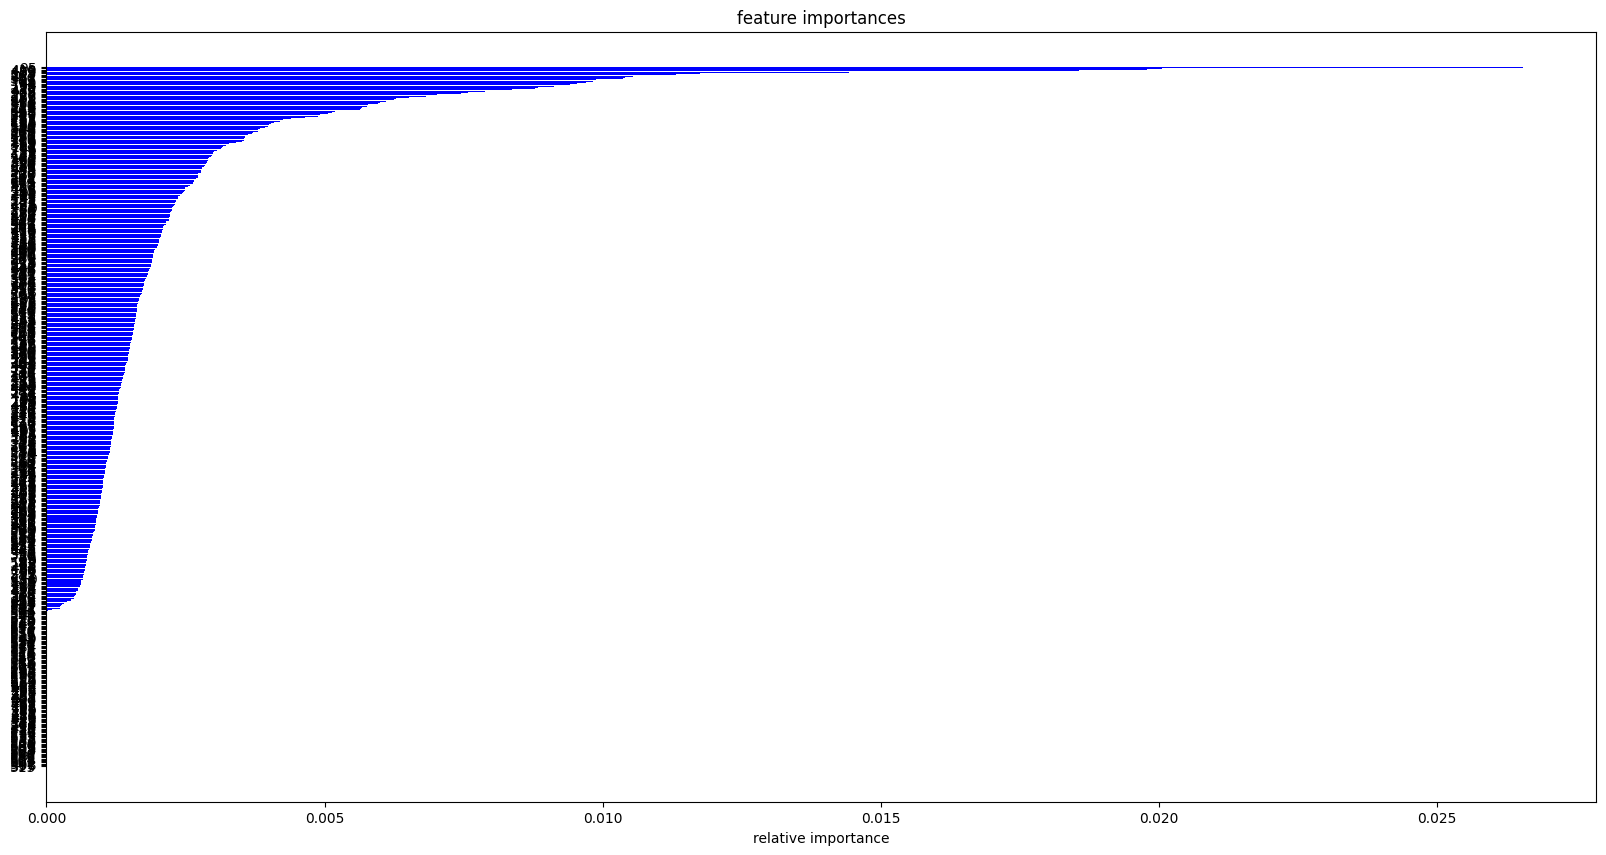

In [ ]:
features=dff.columns
importances=model.feature_importances_
indices=np.argsort(importances)

plt.figure(figsize=(20,10))
plt.title('feature importances')
plt.barh(range(len(indices)),importances[indices],color='b',align='center')
plt.yticks(range(len(indices)),features[indices])
plt.xlabel('relative importance')
plt.show()

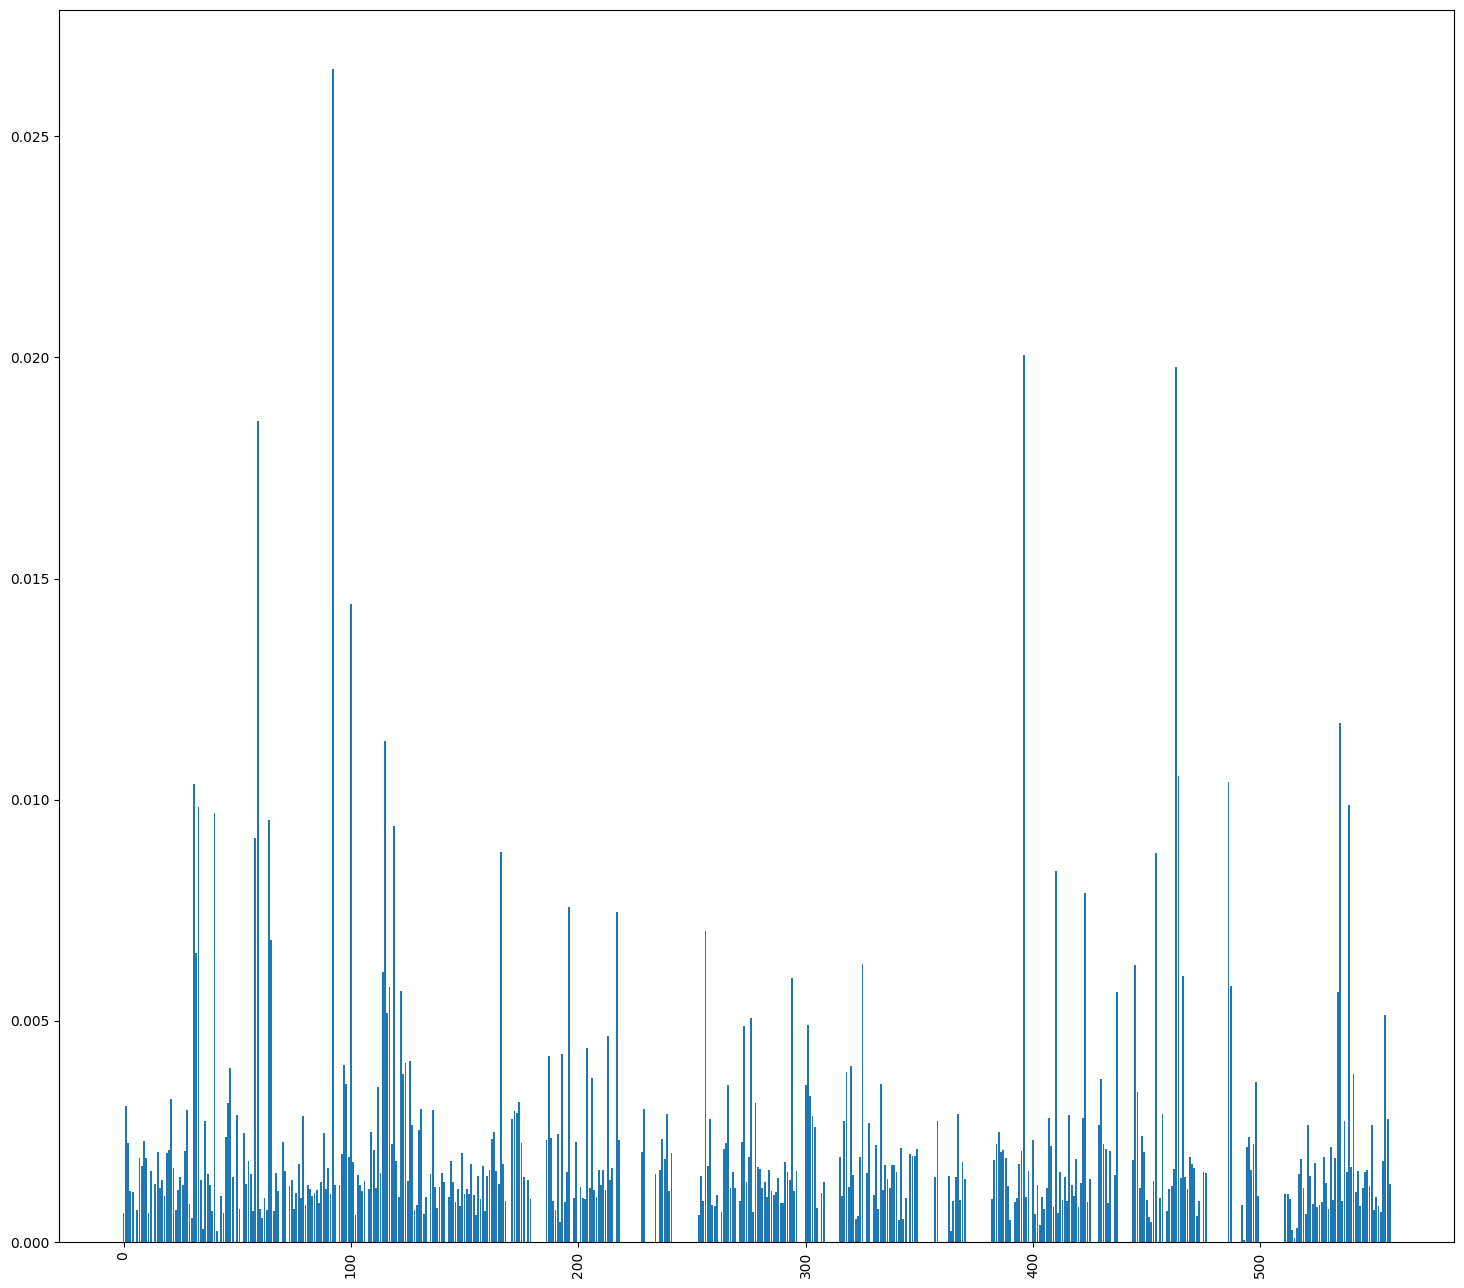

In [ ]:
importance= model.feature_importances_

plt.bar([x for x in range(len(importance))], importance)
plt.xticks(rotation=90)
plt.show()

*  there are many features having very little importance

In [ ]:
feature_df = pd.DataFrame(importance, index=x_train.columns)
feature_df.shape

(558, 1)

In [ ]:
importance.nonzero()

(array([  0,   1,   2,   3,   4,   6,   7,   8,   9,  10,  11,  12,  14,
         15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,
         28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,
         41,  43,  44,  45,  46,  47,  48,  50,  51,  53,  54,  55,  56,
         57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,  68,  70,
         71,  73,  74,  75,  76,  77,  78,  79,  80,  81,  82,  83,  84,
         85,  86,  87,  88,  89,  90,  91,  92,  93,  95,  96,  97,  98,
         99, 100, 101, 102, 103, 104, 105, 106, 108, 109, 110, 111, 112,
        113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125,
        126, 127, 128, 129, 130, 131, 132, 133, 135, 136, 137, 138, 139,
        140, 141, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153,
        154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166,
        167, 168, 171, 172, 173, 174, 175, 176, 178, 179, 186, 187, 188,
        189, 190, 191, 192, 193, 194, 195, 196, 198

In [ ]:
dff.head(2)

,0,1,2,3,4,5,6,7,8,9,...,577,582,583,584,585,586,587,588,589,Pass/Fail
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,0.0162,...,14.9509,0.5005,0.0118,0.0035,2.3630,0.021458,0.016475,0.005283,99.670066,-1
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,-0.0005,...,10.9003,0.5019,0.0223,0.0055,4.4447,0.009600,0.020100,0.006000,208.204500,-1


In [ ]:
df_final =dff.drop('Pass/Fail', axis=1)
target= dff['Pass/Fail']

In [ ]:
# split data
x_train, x_test, y_train, y_test = train_test_split(df_final, target, test_size=0.3, random_state=42, stratify=target)

In [ ]:
# standardization

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train_std = sc.fit_transform(x_train)
x_test_std = sc.transform(x_test)

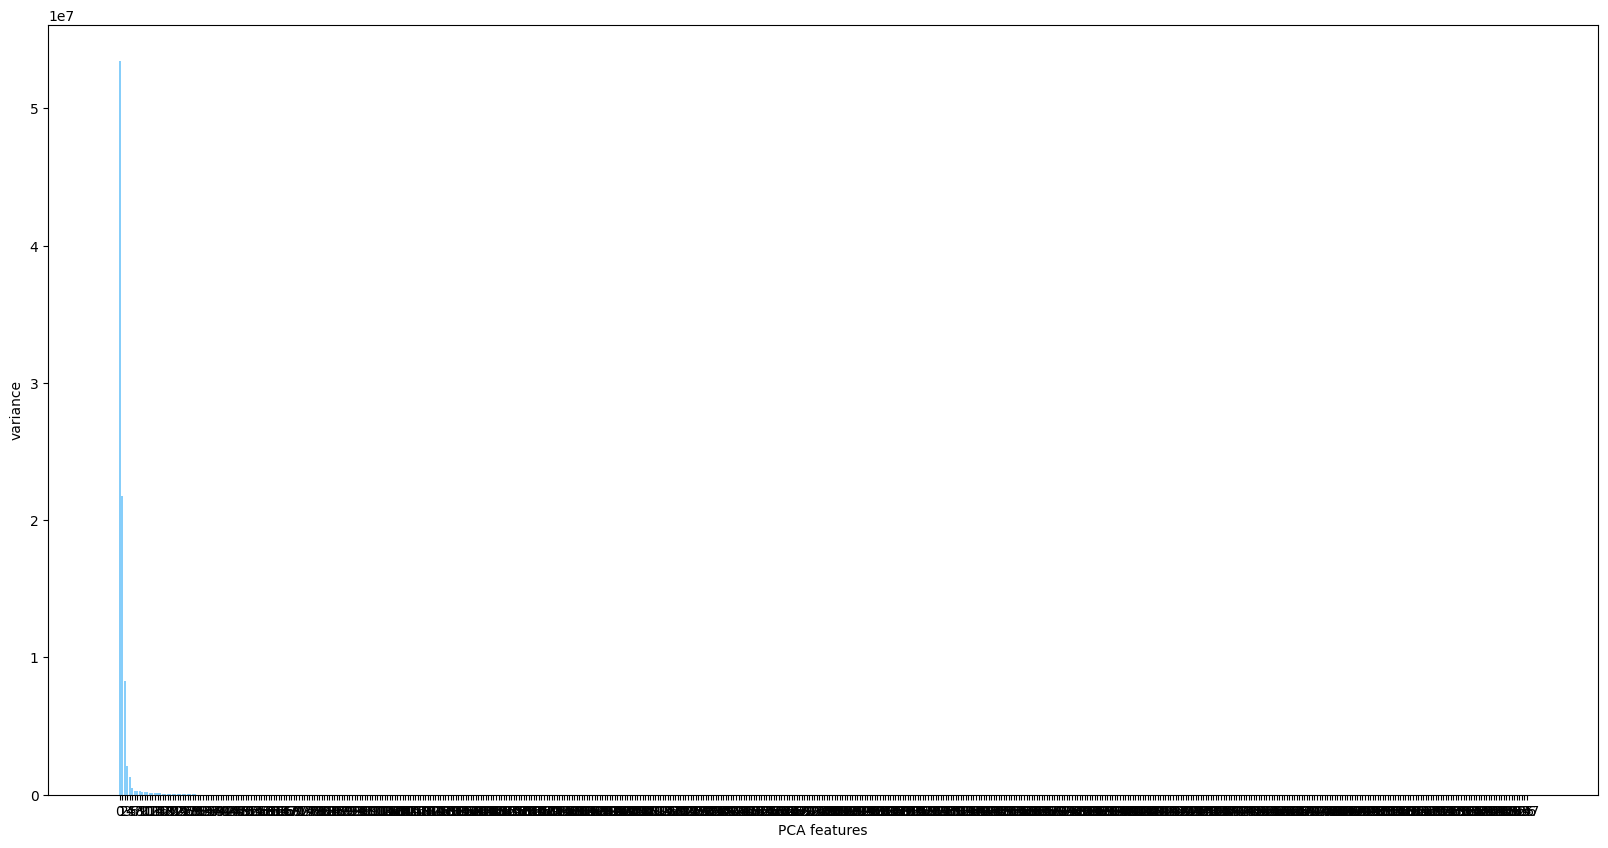

In [ ]:
from sklearn.decomposition import PCA
pca= PCA(random_state=123)
pca.fit(df_final)

features= range(pca.n_components_)

plt.figure(figsize=(20,10))
plt.bar(features,pca.explained_variance_,color='lightskyblue')
plt.xlabel('PCA features')
plt.ylabel('variance')
plt.xticks(features)
plt.show()

In [ ]:
from sklearn.decomposition import PCA
pca= PCA(n_components=50)
data_reduced= pca.fit_transform(x_train_std)
data_test= pca.transform(x_test_std)

In [ ]:
model= RandomForestClassifier(n_estimators=50, criterion= 'gini', max_depth= 100)
model.fit(data_reduced,y_train)

y_pred_rf=model.predict(data_test)

print('accuracy score', accuracy_score(y_pred_rf,y_test))
print('confusion matrix',confusion_matrix(y_pred_rf,y_test))
print('precision score', average_precision_score(y_pred_rf,y_test))

accuracy score 0.9256900212314225
confusion matrix [[436  31]
 [  4   0]]
precision score 0.008492569002123142


## **8. POST TRAINING**

### **8.1. KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
mylist = list(range(2,15))

neighbors= KNeighborsClassifier()

ac_scores=[]

for k in mylist:
  knn= KNeighborsClassifier(n_neighbors=k)
  knn.fit(x_train_sc,y_train_res)
  y_pred=knn.predict(x_test_sc)
  scores= accuracy_score(y_pred,y_test)
  ac_scores.append(scores)
MSE=[1 - x for x in ac_scores]

optimal_k=mylist[MSE.index(min(MSE))]
print('the optimal number of neighbors is {}'.format(optimal_k))

the optimal number of neighbors is 2


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier(n_neighbors=2)
knn.fit(x_train_sc,y_train_res)
y_pred=knn.predict(x_test_sc)

print('accuracy score', accuracy_score(y_pred,y_test))
cm=confusion_matrix(y_pred,y_test)
cm

accuracy score 0.5520169851380042


array([[241,  12],
       [199,  19]])

### **8.2. Gradient boosting**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gb= GradientBoostingClassifier(n_estimators=100,learning_rate=1.0,max_depth=100,random_state=0)
gb.fit(x_train_sc,y_train_res)
y_pred_gb=gb.predict(x_test_sc)

print('accuracy score', accuracy_score(y_pred_gb,y_test))
cm=confusion_matrix(y_pred_gb,y_test)
cm

accuracy score 0.861995753715499


array([[400,  25],
       [ 40,   6]])

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

model= GradientBoostingClassifier(n_estimators=100)

parameters= {
    'max_depth':[10,50],
    'max_features':[5,10]
}

grid_search= GridSearchCV(estimator= model, param_grid= parameters, scoring='f1',cv=3, n_jobs=-1)
grid_search=grid_search.fit(x_train_sc,y_train_res)

best_accuracy= grid_search.best_score_
best_parameters= grid_search.best_params_

predictions= grid_search.predict(x_test_sc)

print("best accuracy:",best_accuracy)
print("best parameters:",best_parameters)
print(classification_report(y_test,predictions))

best accuracy: 0.9970486822821885
best parameters: {'max_depth': 50, 'max_features': 5}
              precision    recall  f1-score   support

          -1       0.93      1.00      0.97       440
           1       0.00      0.00      0.00        31

    accuracy                           0.93       471
   macro avg       0.47      0.50      0.48       471
weighted avg       0.87      0.93      0.90       471



### **8.3. Support Vector Classifier**

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

model= SVC(kernel='linear')
model.fit(x_train_sc,y_train_res)
y_pred_svm=model.predict(x_test_sc)

print('accuracy score', accuracy_score(y_pred_svm,y_test))
cm=confusion_matrix(y_pred_svm,y_test)
cm

accuracy score 0.8662420382165605


array([[398,  21],
       [ 42,  10]])

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

model= SVC(kernel='linear')
parameters= {
    'C':[0.1,1,10,100],
    'gamma':[1,0.1,0.01,0.001],
    'kernel':['linear']
}

grid_search= GridSearchCV(estimator= model, param_grid= parameters, scoring='f1',cv=3, n_jobs=-1)
grid_search=grid_search.fit(x_train_sc,y_train_res)

best_accuracy= grid_search.best_score_
best_parameters= grid_search.best_params_

predictions= grid_search.predict(x_test_sc)

print("best accuracy:",best_accuracy)
print("best parameters:",best_parameters)
print(classification_report(y_test,predictions))

best accuracy: 0.9416446941037105
best parameters: {'C': 1, 'gamma': 1, 'kernel': 'linear'}
              precision    recall  f1-score   support

          -1       0.95      0.90      0.93       440
           1       0.19      0.32      0.24        31

    accuracy                           0.87       471
   macro avg       0.57      0.61      0.58       471
weighted avg       0.90      0.87      0.88       471



### **8.4. Naive Bayes**

In [ ]:
from sklearn.naive_bayes import GaussianNB
model= GaussianNB()
model.fit(x_train_sc,y_train_res)
y_pred_nb=model.predict(x_test_sc)

print('accuracy score', accuracy_score(y_pred_nb,y_test))
cm=confusion_matrix(y_pred_nb,y_test)
cm

accuracy score 0.25690021231422505


array([[ 96,   6],
       [344,  25]])

### **8.5. Support Vector Machine**

In [ ]:
from sklearn.svm import OneClassSVM
model= OneClassSVM(kernel='rbf',degree=3,gamma=0.1,nu=0.005,max_iter=-1)
model.fit(x_train_sc,y_train_res)
y_pred_svm=model.predict(x_test_sc)

print('accuracy score', accuracy_score(y_pred_svm,y_test))
cm=confusion_matrix(y_pred_svm,y_test)
cm

accuracy score 0.9341825902335457


array([[440,  31],
       [  0,   0]])

**Observations:** We tried the following models,

* KNN - poor accuracy
* logistic - good accuracy. able to predict minority class as well
* random forest - biased towards majority class
* gradient boosting - biased towards majority class
* SVC - biased towards majority class
* naive bayes - poor accuracy
* SVM - biased towards majority class

Therefore, we would prefer a logistic model as it is giving decent result and it is able to predict both classes with decent accuracy

### **8.6. Save the selected model for future use using pickle**

In [ ]:
import pickle
saved_model=pickle.dumps(lr2)


In [ ]:
model_from_pickle=pickle.loads(saved_model)

pred=model_from_pickle.predict(x_test_sc)
cm=confusion_matrix(y_test,pred)
cm

array([[375,  65],
       [ 14,  17]])

## **9. CONCLUSION and IMPROVISATION**

### **9.1. Conclusion**


* There were around 592 features, which came down to 558 after treating missing values.
* The target class is highly imbalanced, hence most of the algorithms are biased towards the majority class.
* We tried feature selection using the boosting method and observed that only a few features (approximately 50) are contributing to the prediction, but they are biased towards the majority class.
* We used grid search for selecting the best hyperparameters.





### **9.2. Improvisation**

Detailed suggestions or improvements are needed on quality, quantity, variety, velocity, veracity, etc., of the data points collected by the bank to perform a better analysis in the future.

*  We can use forward selection or backward elimination for selecting relevant features.
* we require more data points as there are many features
* we can try multiple ways to balance the target class
* we can try PCA to reduce number of features
